## BEMM458 Final Assignment

## You are a data scientist working for the European Union. There is an increasing concern inn  relation to the spread and amplification of misinformation on social media.

## General management needs you to conduct an analysis of recent conversations posted on Twitter in relation to spain. You have to identify ongoing misinformation campaigns and profile those users contributing to the spread of misinformation.




In [27]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [151]:
pd.set_option('display.max_rows', 120)

In [147]:
#pd.set_option('display.float_format', '{:.3f}'.format)

In [152]:
spainEnglishAll=pd.read_csv('C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Programming for Business Analytics/BEMM458FinalAssignment1.csv')

In [153]:
spainEnglishAll.columns

Index(['Unnamed: 0', 'tweeet.id', 'tweet.text', 'tweet.created_at',
       'tweet.author_id', 'tweet.lang', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count'],
      dtype='object')

In [154]:
spainEnglishAll

,Unnamed: 0,tweeet.id,tweet.text,tweet.created_at,tweet.author_id,tweet.lang,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count
0,0,1461484086892140000,RT @ESPNFC: EURO 2008 top scorer: Villa ⚽️\nWo...,2021-11-18 23:58:54+00:00,3239744421.000,en,1568.000,0.000,0.000
1,1,1461484079245840000,RT @MrGeepGeep: SOE is over and now is the tim...,2021-11-18 23:58:52+00:00,2312771653.000,en,38.000,0.000,0.000
2,2,1461484043187460000,"RT @AnittaCrave: ""Envolver"" — by Anitta will d...",2021-11-18 23:58:43+00:00,1296857652677550080.000,en,90.000,0.000,0.000
3,3,1461483982105760000,"Men jewelry - Madrid, Spain \n@GuilleRBRB htt...",2021-11-18 23:58:29+00:00,1071703322166480000.000,en,0.000,0.000,5.000
4,4,1461483978658120000,"RT @Foreign_Cat: #Turkey &amp; #Spain, partner...",2021-11-18 23:58:28+00:00,1142741725225650048.000,en,34.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...
47545,47545,1461484434209780000,@only1womble @SimonJonesNews @pritipatel Someo...,2021-11-19 00:00:16+00:00,1733373504.000,en,0.000,0.000,0.000
47546,47546,1461484401712410000,RT @ancientorigins: A team of #scientists has ...,2021-11-19 00:00:09+00:00,100887413.000,en,18.000,0.000,0.000
47547,47547,1461484391255970000,On #Friday Amazing time in #SabatiniGardens #M...,2021-11-19 00:00:06+00:00,995441471938579968.000,en,0.000,0.000,1.000
47548,47548,1461484374558490000,RT @THEMAXHILTON: The wait is over ! you have...,2021-11-19 00:00:02+00:00,832015137263452032.000,en,121.000,0.000,0.000


In [17]:
print(spainEnglishAll.info())
print(spainEnglishAll.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47550 entries, 0 to 47549
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    47550 non-null  int64  
 1   tweeet.id                     47550 non-null  object 
 2   tweet.text                    47550 non-null  object 
 3   tweet.created_at              47537 non-null  object 
 4   tweet.author_id               47537 non-null  float64
 5   tweet.lang                    47537 non-null  object 
 6   public_metrics.retweet_count  47537 non-null  float64
 7   public_metrics.reply_count    47537 non-null  float64
 8   public_metrics.like_count     47524 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.3+ MB
None
(47550, 9)


From the info and dimension of the dataset we understand that there are some missing values in the variables 'tweet.created_at', 'tweet.author_id', 'tweet.lang', 'public_metrics.retweet_count', 'public_metrics.reply_count' and 'public_metrics.like_count'

In [10]:
import seaborn as sns

Before moving to the analysis, let us do some EDA of the data. Let us check if the 'tweet.ids' and 'tweet.texts' are unique. If the 'tweet.ids' are unique but the 'tweet.texts' are repeating then the same 'tweet.text' could have been tweeted  by different users or same users at different points of time.

Let us see the spread of the numeric engagement metrics viz. 'public_metrics.retweet_count', 'public_metrics.reply_count' and 'public_metrics.like_count'. For this let us plot the histograms of these variables and see their spread. Also, let's see thier descriptive sttistics.

In [19]:
print(spainEnglishAll['tweeet.id'].nunique())
print(spainEnglishAll['tweet.text'].nunique())

47550
22777


Thus we see that the tweet.ids are all unique while the tweet.texts are not unique which means the same tweet.texts could have been posted by the user at different points of time.

count   47537
mean      234
std       959
min         0
25%         0
50%         6
75%       124
max     44845
Name: public_metrics.retweet_count, dtype: float64
20.92095507535131


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Retweet Count Histogram with Density Plot')

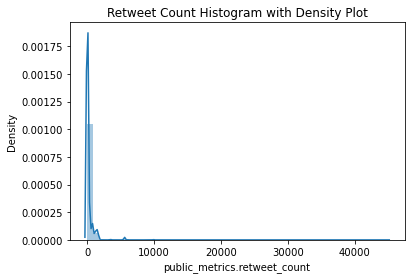

In [29]:
print(spainEnglishAll['public_metrics.retweet_count'].describe())
print(spainEnglishAll['public_metrics.retweet_count'].skew())
retweetdist = sns.distplot(spainEnglishAll['public_metrics.retweet_count'])
retweetdist.set_title('Retweet Count Histogram with Density Plot')
###Thus we see that the 'public_metrics.retweet_count' is skewed to the right

count   47537
mean        0
std         5
min        -0
25%         0
50%         0
75%         0
max       740
Name: public_metrics.reply_count, dtype: float64
121.94767716856964


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Retweet Count Histogram with Density Plot')

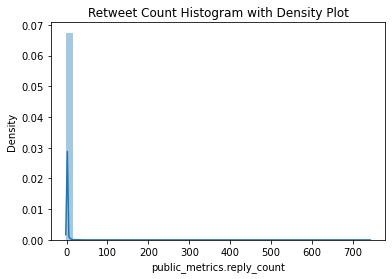

In [30]:
print(spainEnglishAll['public_metrics.reply_count'].describe())
print(spainEnglishAll['public_metrics.reply_count'].skew())
replydist = sns.distplot(spainEnglishAll['public_metrics.reply_count'])
replydist.set_title('Retweet Count Histogram with Density Plot')
###Thus we see that the 'public_metrics.reply_count' is highly skewed to the right

count   47524
mean        3
std       106
min         0
25%         0
50%         0
75%         0
max     15423
Name: public_metrics.like_count, dtype: float64
106.1119749354647


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Retweet Count Histogram with Density Plot')

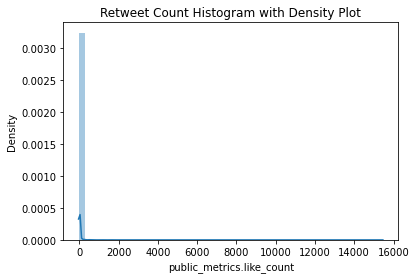

In [32]:
print(spainEnglishAll['public_metrics.like_count'].describe())
print(spainEnglishAll['public_metrics.like_count'].skew())
likedist = sns.distplot(spainEnglishAll['public_metrics.like_count'])
likedist.set_title('Retweet Count Histogram with Density Plot')
###Thus we see that the 'public_metrics.like_count' is highly skewed to the right

In [78]:
print(spainEnglishAll[['public_metrics.retweet_count', 'public_metrics.reply_count', 'public_metrics.like_count']].mean())
print(spainEnglishAll[['public_metrics.retweet_count', 'public_metrics.reply_count', 'public_metrics.like_count']].median())
print(spainEnglishAll[['public_metrics.retweet_count', 'public_metrics.reply_count','public_metrics.like_count']].mode())

public_metrics.retweet_count   234
public_metrics.reply_count       0
public_metrics.like_count        3
dtype: float64
public_metrics.retweet_count   6
public_metrics.reply_count     0
public_metrics.like_count      0
dtype: float64
   public_metrics.retweet_count  public_metrics.reply_count  \
0                             0                           0   

   public_metrics.like_count  
0                          0  


## Question 1. Which twitter conversations have large levels of amplification ? (15 points)
### Tip: consider number of retweets, likes, etc as proxies to measure the spread of information on social media

In order to extract the twitter conversations having large levels of amplification, first we create a KPI averaging the retweets, recounts and likes. 

*While defining the KPI, equal weights of 1 are taken for all the three retweet, reply and like. The weights of these engagement variables usually depends on the objective of the tweet, for instance if it is a marketing tweet for introduction of a new product, retweets would be of more wightage since the tweet's objective would be to diffuse or spread the information about the new product. In this data, the tweets are conversation about a melange of happenings in European Union. There is no singular objective of the convesations. The max count of these variables are quite different, at the same time the std, dispersion of these variables are also differnt. Equal weights are taken for all the three (retweet, reply and like) to get an approximate KPI of the engagement parameters.*

#### Approach one:

In [75]:
spainEnglishAll.sort_values(by = 'engagement_KPI', ascending = False).head(n=3)

,Unnamed: 0,tweeet.id,tweet.text,tweet.created_at,tweet.author_id,tweet.lang,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,engagement_KPI
23467,23467,1461162679809150000,RT @NCTsmtown_127: #Johnny’s Photo Diary:Spain...,2021-11-18 02:41:44+00:00,1290910527393210112,en,44845,0,0,14948
23656,23656,1461157780664900000,RT @NCTsmtown_127: #Johnny’s Photo Diary:Spain...,2021-11-18 02:22:16+00:00,1101831422631800064,en,43945,0,0,14648
8820,8820,1461371211343020000,RT @NCTsmtown_127: #Johnny’s Photo Diary:Spain...,2021-11-18 16:30:22+00:00,1168957082,en,43945,0,0,14648


In [73]:
spainEnglishAll.sort_values(by = 'public_metrics.reply_count', ascending = False).head(n=3)

,Unnamed: 0,tweeet.id,tweet.text,tweet.created_at,tweet.author_id,tweet.lang,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,engagement_KPI
2434,2434,1461450207657340000,EURO 2008 top scorer: Villa ⚽️\nWorld Cup 2010...,2021-11-18 21:44:16+00:00,18091004,en,1568,740,15423,5910
27778,27778,1461806775594880000,From Spain: Manchester United are ready to bid...,2021-11-19 21:21:09+00:00,2430359540,en,379,512,6058,2316
34485,34485,1461715384516710000,🚨⚽️ | Fifa have released their new rankings\n\...,2021-11-19 15:17:59+00:00,1412833835776079872,en,93,215,3358,1222


In [74]:
spainEnglishAll.sort_values(by = 'public_metrics.like_count', ascending = False).head(n=3)

,Unnamed: 0,tweeet.id,tweet.text,tweet.created_at,tweet.author_id,tweet.lang,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,engagement_KPI
2434,2434,1461450207657340000,EURO 2008 top scorer: Villa ⚽️\nWorld Cup 2010...,2021-11-18 21:44:16+00:00,18091004,en,1568,740,15423,5910
32805,32805,1461735560435750000,"""What if Lionel Messi picked Spain over Argent...",2021-11-19 16:38:09+00:00,1443958261917509888,en,895,138,12216,4416
27778,27778,1461806775594880000,From Spain: Manchester United are ready to bid...,2021-11-19 21:21:09+00:00,2430359540,en,379,512,6058,2316


Though, the weigtage of the engagement metric depends upon the objective of the tweet, if we see from a generic perspective with equal weightage given to all the three i.e., retweet, reply and like, we see that the tweets which come in the top percentile of amplification are - 
EURO 2008 top scorer: Villa ⚽️\nWorld Cup 2010... (tweet id - 1461450207657340000, "What if Lionel Messi picked Spain over Argent...(tweet id - 1461735560435750000) and Madrid, Spain 🇪🇸 #NaturePhotogr...(tweeet id - 1461338150610080000). 
If we see only from the KPI perspective the top amplified tweet is driven by retweets and is - RT @NCTsmtown_127: #Johnny’s Photo Diary:Spain...(tweet id - 1461162679809150000).
The top tweet driven by replies and likes is the same as found from to percentile of all the proxies.

#### Approach 2

In [79]:
###Let us group by the entire data by the unique tweet texts.

Thus we get the top tweets from KPI perspective which are driven only by retweets.

In [107]:
toptweettextdata = spainEnglishAllgroupedtop.sort_values(by = 'engagement_KPI', ascending = False).head()
toptweettextdata

,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,engagement_KPI
tweet.text,,,,
EURO 2008 top scorer: Villa ⚽️\nWorld Cup 2010 winner: Spain 🇪🇸\n\nEURO 2012 top scorer: Gomez ⚽️\nWorld Cup 2014 winner: Germany 🇩🇪\n\nEURO 2016 top scorer: Griezmann ⚽️\nWorld Cup 2018 winner: France 🇫🇷\n\nEURO 2020 top scorer: Ronaldo ⚽️\nWorld Cup 2022 winner: 🤔 https://t.co/NkAdzUjOxZ,1568,740,15423,5910
"""What if Lionel Messi picked Spain over Argentina😳"" https://t.co/lgHniNyeKW",895,138,12216,4416
"From Spain: Manchester United are ready to bid €70m for Real Madrid's Federico Valverde, with the club believing his skill-set fits the Premier League perfectly",379,512,6058,2316
"Madrid, Spain 🇪🇸 #NaturePhotography #travelphotography #landscape #travel https://t.co/jVDiP3m0dY",861,61,4240,1721
"I wanted to go to LFL next year but as many of you know things didn't really go as planned, however I wanted to choose the roster I thought was the best for my future\nI'll win in Spain and get my revenge on KC at eumasters, I'll see you there @Kammeto @KoteiZousa @Striker_KC",116,79,4632,1609


In [111]:
toptweettextdata.index  ###This gives us the top amplified unique tweet texts.

Index(['EURO 2008 top scorer: Villa ⚽️\nWorld Cup 2010 winner: Spain 🇪🇸\n\nEURO 2012 top scorer: Gomez ⚽️\nWorld Cup 2014 winner: Germany 🇩🇪\n\nEURO 2016 top scorer: Griezmann ⚽️\nWorld Cup 2018 winner: France 🇫🇷\n\nEURO 2020 top scorer: Ronaldo ⚽️\nWorld Cup 2022 winner: 🤔 https://t.co/NkAdzUjOxZ',
       '"What if Lionel Messi picked Spain over Argentina😳" https://t.co/lgHniNyeKW',
       'From Spain: Manchester United are ready to bid €70m for Real Madrid's Federico Valverde, with the club believing his skill-set fits the Premier League perfectly',
       'Madrid, Spain 🇪🇸                #NaturePhotography #travelphotography #landscape #travel https://t.co/jVDiP3m0dY',
       'I wanted to go to LFL next year but as many of you know things didn't really go as planned, however I wanted to choose the roster I thought was the best for my future\nI'll win in Spain and get my revenge on KC at eumasters, I'll see you there @Kammeto @KoteiZousa @Striker_KC'],
      dtype='object', name='twe

## Question 2. Analysis of highly amplified conversations (15 points)

### Please describe  5 highly amplified conversations which are trying to polarize or misinform.

## Tip: given a tweet.id it is possible to have a detailed look at twitter by appending this id to the url: https://twitter.com/anyuser/status/


### For instance given the tweet.id: 1461577564850319362 you can inspect its content by having a look at: https://twitter.com/anyuser/status/1461577564850319362



Extract the top highly amplified conversations i.e. 'tweet.text' and 'tweeet.ids' from the top percentiles of retweet_count, reply_count, like_count and engagement_KPI and then inspect each using the above url and the variable - 'tweeet.id'

In [132]:
###Let us create the top decile markers for the tweet amplification proxy variables.
retweet_counttop80 = spainEnglishAll['public_metrics.retweet_count'].quantile(0.85)
reply_counttop80 = spainEnglishAll['public_metrics.reply_count'].quantile(0.85)
like_counttop80 = spainEnglishAll['public_metrics.like_count'].quantile(0.85)
engagement_counttop80 = spainEnglishAll['engagement_KPI'].quantile(0.85)

In [133]:
topamplifiedtweetdata = spainEnglishAll[(spainEnglishAll['public_metrics.retweet_count'] > retweet_counttop80) & (spainEnglishAll['public_metrics.reply_count'] > reply_counttop80) & (spainEnglishAll['public_metrics.like_count'] > like_counttop80) & (spainEnglishAll['engagement_KPI'] > engagement_counttop80)]

In [134]:
topamplifiedtweetsorted = topamplifiedtweetdata.sort_values(by='engagement_KPI', ascending = False)
topamplifiedtweetsorted

,Unnamed: 0,tweeet.id,tweet.text,tweet.created_at,tweet.author_id,tweet.lang,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,engagement_KPI
2434,2434,1461450207657340000,EURO 2008 top scorer: Villa ⚽️\nWorld Cup 2010...,2021-11-18 21:44:16+00:00,18091004,en,1568,740,15423,5910
32805,32805,1461735560435750000,"""What if Lionel Messi picked Spain over Argent...",2021-11-19 16:38:09+00:00,1443958261917509888,en,895,138,12216,4416
27778,27778,1461806775594880000,From Spain: Manchester United are ready to bid...,2021-11-19 21:21:09+00:00,2430359540,en,379,512,6058,2316
11708,11708,1461338150610080000,"Madrid, Spain 🇪🇸 #NaturePhotogr...",2021-11-18 14:19:00+00:00,1383404685189540096,en,861,61,4240,1721
15636,15636,1461295289608940000,"In the last 20 years Spain has built 1,900 mil...",2021-11-18 11:28:41+00:00,1662773784,en,658,57,2362,1026
11438,11438,1461341020264740000,Another day of sky high electricity prices in ...,2021-11-18 14:30:24+00:00,1647573157,en,480,76,1011,522
20843,20843,1461225890226910000,Searching 100x #memecoin in this peace 😻\n\nOu...,2021-11-18 06:52:55+00:00,4593671721,en,401,57,529,329


In [122]:
print(topamplifiedtweetsorted['tweet.text'])
print(topamplifiedtweetsorted['tweeet.id'])

2434     EURO 2008 top scorer: Villa ⚽️\nWorld Cup 2010...
32805    "What if Lionel Messi picked Spain over Argent...
27778    From Spain: Manchester United are ready to bid...
11708    Madrid, Spain 🇪🇸                #NaturePhotogr...
15636    In the last 20 years Spain has built 1,900 mil...
11438    Another day of sky high electricity prices in ...
20843    Searching 100x #memecoin in this peace 😻\n\nOu...
Name: tweet.text, dtype: object
2434     1461450207657340000
32805    1461735560435750000
27778    1461806775594880000
11708    1461338150610080000
15636    1461295289608940000
11438    1461341020264740000
20843    1461225890226910000
Name: tweeet.id, dtype: object


In [146]:
###Also let us consider the amplified conversation from the perspective of high KPI driven by retweets
spainEnglishsortedKPI = spainEnglishAll.sort_values(by = 'engagement_KPI', ascending = False)
spainEnglishsortedKPI.head()

,Unnamed: 0,tweeet.id,tweet.text,tweet.created_at,tweet.author_id,tweet.lang,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,engagement_KPI
23467,23467,1461162679809150000,RT @NCTsmtown_127: #Johnny’s Photo Diary:Spain...,2021-11-18 02:41:44+00:00,1290910527393210112,en,44845,0,0,14948
23656,23656,1461157780664900000,RT @NCTsmtown_127: #Johnny’s Photo Diary:Spain...,2021-11-18 02:22:16+00:00,1101831422631800064,en,43945,0,0,14648
8820,8820,1461371211343020000,RT @NCTsmtown_127: #Johnny’s Photo Diary:Spain...,2021-11-18 16:30:22+00:00,1168957082,en,43945,0,0,14648
39357,39357,1461649200882400000,RT @NCTsmtown_127: Spain here we goooooo\n\n#N...,2021-11-19 10:55:00+00:00,1064006291087970048,en,35930,0,0,11977
45373,45373,1461537918900600000,RT @NCTsmtown_127: #Johnny’s Photo Diary:Spain...,2021-11-19 03:32:48+00:00,1382234880465979904,en,34538,0,0,11513


Let us examine each of these above tweets using the url: https://twitter.com/anyuser/status/ appended by the 'tweet.id's found from the topamplifiedtweetsorted and spainEnglishsortedKPI

The tweet ids to be examined are - 1461162679809150000, 1101831422631800064, 1461450207657340000, 1461735560435750000,1461806775594880000, 1461338150610080000, 1461295289608940000, 1461341020264740000, 1461225890226910000

**Amongst all above the highly amplified tweets the ones corresponding to the tweet.ids - 1461341020264742912, 1461295289608945670, 1461225890226917377, 1461806775594885122, 1461735560435752961 seemed to be polarized or misinforming because there were replies to those tweets countering them as misinformation. Also the tweet creators of these conversation are having large number of followers which is helping them to spread the polarized information. Below given are the tweets and the replies countering them about polarization or partial information or misinformation are -**

"Another day of sky high electricity prices in Europe, particularly in countries like France and Spain. For the later, it's the 4th highest day-ahead power price ever. European politicians who hoped for lower prices are beginning to realize that the winter has yet to start" by @JavierBlas ( no of followers: 137.1K) - counter replies: 'Those with the cheapest prices, what do we know of their self-sufficiency at the very same time?', 'Relative to salary. Im sure portugal is highest', 'Why is germany that less expensive va France???', 'It is not.
That's only the market price.Germans on top of that pay ~32 B€/y in subsidies (they call them "feed in tariffs") for the renewbabbles, that's more than 100€/MWh for each REN MWh.'

'In the last 20 years Spain has built 1,900 mil...' by @iambadatlife (no of followers:12.2k) - counter replies: 'Spain is 505,000sqkm. Four and half times England. Mind they have bankrupted RENFE and only two lines pay there way.'

"Searching 100x #memecoin in this peace 😻\n\nOu..." by @gems_1000 (no of followers: 178.3k) - counter replies: 'Why do you search memecoins? I guess it's better to find a project with a good perspective and buy their tokens'

" From Spain: Manchester United are ready to bid..." by @utdreport ( no of followers: 743.4k) - counter replies: 'He just signed a 7 year contract why the hell are you even reporting this'

"What if Lionel Messi picked Spain over Argent..." by @loal_worldwide (no of followers: 1827) - counter replies: "210 goals?
😭
if ronaldo has 100+
what makes u think messi would have 200+?"

## Question 3. Compute the z-score of the column "public_metrics.retweet_count" (15 points)
## tip: refer to the definition of Z-score at" https://www.statisticshowto.com/probability-and-statistics/z-score/

Calculate the mean and the standard deviation then calculate the z-score of each element in the column and add the values as another column. Look if the values follow a normal distribution.

In [35]:
mean_retweet_count = spainEnglishAll['public_metrics.retweet_count'].mean()
sd_retweet_count = spainEnglishAll['public_metrics.retweet_count'].std()
print(mean_retweet_count)
print(sd_retweet_count)

233.72148011022992
959.4952629778896


In [36]:
spainEnglishAll['retweet_count_zscore'] = (spainEnglishAll['public_metrics.retweet_count'] - mean_retweet_count)/sd_retweet_count

As an alternative approach we can use a function to calculate the zscore and store it in a new column

In [37]:
spainEnglishAll.columns

Index(['Unnamed: 0', 'tweeet.id', 'tweet.text', 'tweet.created_at',
       'tweet.author_id', 'tweet.lang', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'retweet_count_zscore', 'reply_count_zscore', 'like_count_zscore'],
      dtype='object')

In [38]:
zscore1 = spainEnglishAll['public_metrics.retweet_count'].apply(lambda x: (x- mean_retweet_count)/sd_retweet_count)

In [39]:
##spainEnglishAll['retweet_count_zscore'] = zscore1

Another alternate way is to create a function which takes a series and calculates the z-score foe each of the element

In [40]:
def zscorefunc(ser1):
    list1 = []
    meanval = ser1.mean()
    sdval = ser1.std()
    for i in ser1:
        list1.append((i-meanval)/sdval)
    return list1

In [41]:
zscore2 = zscorefunc(spainEnglishAll['public_metrics.retweet_count'])

In [42]:
zscore1 == zscore2
print(zscore1[(zscore1 != zscore2)])

505     nan
3806    nan
6633    nan
15774   nan
26917   nan
27172   nan
37614   nan
38124   nan
41275   nan
41350   nan
42106   nan
44420   nan
45141   nan
Name: public_metrics.retweet_count, dtype: float64


In [43]:
spainEnglishAll['retweet_count_zscore'][(zscore1 != spainEnglishAll['retweet_count_zscore'])]

505     nan
3806    nan
6633    nan
15774   nan
26917   nan
27172   nan
37614   nan
38124   nan
41275   nan
41350   nan
42106   nan
44420   nan
45141   nan
Name: retweet_count_zscore, dtype: float64

Thus we have seen that the zscores calculated by all the three approaches are same. There were few nan values which are generated for the nan values of the retweet_count

Thus we can feed any of these three series and create a desired column in the dataset.

## Question 4. Filter conversations with a z-score larger than 10. (15 points)

Take the score of z-score 10 and from the z-score column take the records of values > 10

In [44]:
spainEnglishHighzscoredata = spainEnglishAll[(spainEnglishAll['retweet_count_zscore'] > 10)]

In [45]:
spainEnglishHighzscoredata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 859 to 45378
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    62 non-null     int64  
 1   tweeet.id                     62 non-null     object 
 2   tweet.text                    62 non-null     object 
 3   tweet.created_at              62 non-null     object 
 4   tweet.author_id               62 non-null     float64
 5   tweet.lang                    62 non-null     object 
 6   public_metrics.retweet_count  62 non-null     float64
 7   public_metrics.reply_count    62 non-null     float64
 8   public_metrics.like_count     62 non-null     float64
 9   retweet_count_zscore          62 non-null     float64
 10  reply_count_zscore            62 non-null     float64
 11  like_count_zscore             62 non-null     float64
dtypes: float64(7), int64(1), object(4)
memory usage: 6.3+ KB


In [46]:
spainEnglishHighzscoredata.describe()

,Unnamed: 0,tweet.author_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,retweet_count_zscore,reply_count_zscore,like_count_zscore
count,62,62,62,62,62,62,62,62
mean,26186,872064516532237440,18558,0,0,19,-0,-0
std,15448,578619409702242688,10621,0,0,11,0,0
min,859,16095339,9909,0,0,10,-0,-0
25%,11336,2943282844,9909,0,0,10,-0,-0
50%,23656,1110000000000000000,11273,0,0,12,-0,-0
75%,41892,1360000000000000000,26867,0,0,28,-0,-0
max,45378,1430000000000000000,44845,0,0,46,-0,-0


In [50]:
###The conversations with z-score > 10 are
spainEnglishHighzscoredata['tweet.text'].unique()

array(['RT @viquirepublica: 📌This is the real problem in Catalonia .... Spain is a Fascist State \nHow long are you going to shut up Europe? https:/…',
       'RT @MesutOzil1088: I grew up as a @Fenerbahce fan as a kid in Germany - every German-Turkish person supports a Turkish team when they grow…',
       'RT @TheeAzanian: Normalize posting these poor parts of Europe like they do with Africa. Cañada Real (just outside of Madrid), Spain. https:…',
       'RT @NCTsmtown_127: #Johnny’s Photo Diary:Spain\n\n#Johntography\n#NCT #NCT127\n#JAEHYUN #MARK \n#Spain #Sevilla https://t.co/jPNpBlVUcJ',
       "RT @NCTsmtown_127: #Johnny's Photo Diary:Spain\n\n#Johntography \n#NCT #NCT127 #TAEYONG \n#Spain #Sevilla https://t.co/8CJuEZDXER",
       'RT @bubbaprog: Here is how the Nicki Minaj story was covered on CNC3 Television in Port of Spain, Trinidad. I assure you this is worth all…',
       'RT @NCTsmtown_127: Amazing time in SPAIN🇪🇸\nGracias!!\n\n#NCT #NCT127 #JAEHYUN\n#MTVEMA @mtv @mtvema ht

## Question 5. Find the top 5 amplifiers (15 points)
### we consider amplifiers those twitter users who are involved in highly amplified conversations

Extract the top 5 tweet.ids of the top highly amplified conversations i.e. 'tweet.text' from the top deciles (or Z scores)

The top 5 amplifiers if we go by the z-scores of retweet counts

In [51]:
spainEnglishAll['retweet_zscore'] = zscore2 ##as calculated by using the function zscorefunc

In [71]:
spainEnglishAll.head(n=5)

,Unnamed: 0,tweeet.id,tweet.text,tweet.created_at,tweet.author_id,tweet.lang,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,retweet_count_zscore,reply_count_zscore,like_count_zscore,retweet_zscore
0,0,1.46148E+18,RT @ESPNFC: EURO 2008 top scorer: Villa ⚽️\nWo...,2021-11-18 23:58:54+00:00,3239744421,en,1568,0,0,1,-0,-0,1
1,1,1.46148E+18,RT @MrGeepGeep: SOE is over and now is the tim...,2021-11-18 23:58:52+00:00,2312771653,en,38,0,0,-0,-0,-0,-0
2,2,1.46148E+18,"RT @AnittaCrave: ""Envolver"" — by Anitta will d...",2021-11-18 23:58:43+00:00,1300000000000000000,en,90,0,0,-0,-0,-0,-0
3,3,1.46148E+18,"Men jewelry - Madrid, Spain \n@GuilleRBRB htt...",2021-11-18 23:58:29+00:00,1070000000000000000,en,0,0,5,-0,-0,0,-0
4,4,1.46148E+18,"RT @Foreign_Cat: #Turkey &amp; #Spain, partner...",2021-11-18 23:58:28+00:00,1140000000000000000,en,34,0,0,-0,-0,-0,-0


In [59]:
spainEngsorted = spainEnglishAll.sort_values('retweet_zscore', ascending = False)

In [67]:
print(len(spainEngsorted['tweet.text'].unique()))
print(spainEngsorted.shape)

22777
(47550, 13)


From the data we observed that, there are only 22777 unique tweet.texts against 47550 records. But the same tweet texts have been tweeted by different tweet.ids or tweet.users, or by the same ids at different times.
If we considers top amplifying tweeter users (even if they are are tweeting the same text) then the top ones as found from highest retweet zscore are: 
3239744421, 2312771653, 1300000000000000000, 1070000000000000000, 1140000000000000000

Alternative approach:
In this approach we can take those tweets which we get by scooping the top percentile scores for all the amplification proxies - retweet, reply and like. Then we take the top five tweets and the tweet users ids of those tweets.

In [79]:
###Let us create the top decile markers for the tweet amplification proxy variables.
retweet_counttop80 = spainEnglishAll['public_metrics.retweet_count'].quantile(0.87)
reply_counttop80 = spainEnglishAll['public_metrics.reply_count'].quantile(0.87)
like_counttop80 = spainEnglishAll['public_metrics.like_count'].quantile(0.87)

In [80]:
topamplifiedtweetdata = spainEnglishAll[(spainEnglishAll['public_metrics.retweet_count'] > retweet_counttop80) & (spainEnglishAll['public_metrics.reply_count'] > reply_counttop80) & (spainEnglishAll['public_metrics.like_count'] > like_counttop80)]

In [81]:
topamplifiedtweetdata

,Unnamed: 0,tweeet.id,tweet.text,tweet.created_at,tweet.author_id,tweet.lang,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,retweet_count_zscore,reply_count_zscore,like_count_zscore,retweet_zscore
2434,2434,1.46145E+18,EURO 2008 top scorer: Villa ⚽️\nWorld Cup 2010...,2021-11-18 21:44:16+00:00,18091004,en,1568,740,15423,1,161,145,1
11438,11438,1.46134E+18,Another day of sky high electricity prices in ...,2021-11-18 14:30:24+00:00,1647573157,en,480,76,1011,0,17,9,0
11708,11708,1.46134E+18,"Madrid, Spain 🇪🇸 #NaturePhotogr...",2021-11-18 14:19:00+00:00,1380000000000000000,en,861,61,4240,1,13,40,1
15636,15636,1.4613E+18,"In the last 20 years Spain has built 1,900 mil...",2021-11-18 11:28:41+00:00,1662773784,en,658,57,2362,0,12,22,0
32805,32805,1.46174E+18,"""What if Lionel Messi picked Spain over Argent...",2021-11-19 16:38:09+00:00,1440000000000000000,en,895,138,12216,1,30,115,1


After taking the top scores of the 87th percentile for each of the variables retweet, reply and like, we get the top 5 tweets and the respective amplifiers are - 18091004, 1647573157, 1380000000000000000, 1662773784, 1440000000000000000

## Question 6. Extract, from the text colum, information on who created the conversation in the first place (15 points)
### Tip: retweeted conversations start with the pattern RT@
### For illustration purposes, the text "RT @20splentyforus: France, like UK should set a national 30km/h or 20mph urban default limit." was originally created by @20splentyforus
### Tip2. consider applying a regex pattern to the DataFrame using apply method

At first we will create a regex pattern to identify the retweeted patterns and extract them.

In [84]:
import re

In [144]:
retweetexp = r"(RT\s+@\w+|RT@\w+)"

In [161]:
obj = re.match(pattern = retweetexp, string = "RT @splenty_forus: France, like UK should set a national 30km/h or 20mph urban default limit.")
str1 = obj[1]
re.findall(pattern = "@\w+", string = str1)[0]

'@splenty_forus'

In [249]:
###At first let us create an array which stores all the extracted retweeted names
mentions1 = spainEnglishAll['tweet.text'].apply(lambda str1: re.findall(pattern = retweetexp, string = str1))
spainEnglishAll['retweet_mentions'] = spainEnglishAll['tweet.text'].apply(lambda str1: re.findall(pattern = retweetexp, string = str1)[0] if len(re.findall(pattern = retweetexp, string = str1)) > 0 else "mention not found")
spainEnglishAll['retweet_mentions']

0                RT @ESPNFC
1            RT @MrGeepGeep
2           RT @AnittaCrave
3         mention not found
4           RT @Foreign_Cat
                ...        
47545     mention not found
47546    RT @ancientorigins
47547     mention not found
47548      RT @THEMAXHILTON
47549     mention not found
Name: retweet_mentions, Length: 47550, dtype: object

Thus we create a column in the data which gives us all the retweet mentions. In case the tweet is not found with an mention it is mentioned that 'mention not found'. 

In [261]:
###Let us quickly cross-check the data where the mentions are not found to assure they contain no retweet mentions
spainEnglishAll[spainEnglishAll['retweet_mentions'] == "mention not found"]['tweet.text']

3        Men jewelry  - Madrid, Spain \n@GuilleRBRB htt...
5        Just posted a photo @ Riells Del Fay, Cataluna...
6        Spain castle Coca \nI feel we're so close to g...
11       @walkin90pod First soccer game: US/England 6/9...
12       France and Spain is later revealed to be Italy...
                               ...                        
47542    i'm in spain without the s rn my back hurts so...
47544    @Lisaelghaffour @TomasZdechovsky There are tho...
47545    @only1womble @SimonJonesNews @pritipatel Someo...
47547    On #Friday Amazing time in #SabatiniGardens #M...
47549    #Barcelona Nov 19 01:00 Temperature 10C Wind N...
Name: tweet.text, Length: 18805, dtype: object

In [276]:
###Let us create a dataframe which contains only the data of the retweeted tweets.
spainretweetdata = spainEnglishAll[spainEnglishAll['retweet_mentions'] != "mention not found"]
spainretweetdata.head(n=5)
spainretweetdata.shape

(28745, 15)

In [266]:
spainretweetdata['conversation_creator'] = spainretweetdata['retweet_mentions'].apply(lambda str1: re.findall(pattern = r"@\w+", string = str1)[0])

<ipython-input-266-0c0c5df73b8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spainretweetdata['conversation_creator'] = spainretweetdata['retweet_mentions'].apply(lambda str1: re.findall(pattern = r"@\w+", string = str1)[0])


In [269]:
##An alternate way
spainEnglishAll['conversation_creator'] = spainEnglishAll['retweet_mentions'].apply(lambda str1: re.findall(pattern = r"@\w+", string = str1)[0] if str1 != 'mention not found' else "tweet user id is the creator")

In [270]:
spainEnglishAll['conversation_creator']

0                             @ESPNFC
1                         @MrGeepGeep
2                        @AnittaCrave
3        tweet user id is the creator
4                        @Foreign_Cat
                     ...             
47545    tweet user id is the creator
47546                 @ancientorigins
47547    tweet user id is the creator
47548                   @THEMAXHILTON
47549    tweet user id is the creator
Name: conversation_creator, Length: 47550, dtype: object

In [272]:
spainretweetdata['conversation_creator']

0                @ESPNFC
1            @MrGeepGeep
2           @AnittaCrave
4           @Foreign_Cat
7        @KeithOlbermann
              ...       
47538          @BintingM
47539             @MLMIF
47543            @ESPNFC
47546    @ancientorigins
47548      @THEMAXHILTON
Name: conversation_creator, Length: 28745, dtype: object

In [274]:
###Thus the column 'conversation_creator' in the data gives us the names of the creator the conversations.

## Question 7. Please briefly reflect on how would you try to mitigate misinformation on social media (2 paragraphs maximum). (10 points)

In [277]:
###Group by the conversation creators and the tweet.texts and create word clouds for the top amplified tweets. Extract the hashtags and create work cloud for the hashtags. 
###The most amplified and polarized hastags conversations should be observed.

In [278]:
###developing an algorithm to scan misinformation tweets using negative or positive words scan and then engaging and replying to counter those tweets.